In [16]:
%matplotlib inline

In [21]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations # Code size
encoding_dim = 16  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

layer1 = Dense(256, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(layer1)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(256)(encoded)

layer2 = Dense(784, activation='relu')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, layer2)

In [22]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [23]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

In [24]:
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')

#### Model Training

In [25]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print ( x_train.shape )
print ( x_test.shape )

(60000, 784)
(10000, 784)


In [27]:
autoencoder.fit(x_train, 
                x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0369 - val_loss: 0.0283
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0257 - val_loss: 0.0260
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0237 - val_loss: 0.0222
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0227 - val_loss: 0.0236
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0220 - val_loss: 0.0220
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0216 - val_loss: 0.0210
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0207 - val_loss: 0.0205
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0206 - val_loss: 0.02

In [28]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [29]:
encoded_imgs[0]

array([3.1127124 , 1.3009022 , 0.4684448 , 0.8714099 , 2.5000646 ,
       0.4531023 , 2.23847   , 3.0801585 , 1.7020136 , 3.2695148 ,
       0.8741158 , 0.31284136, 0.18936726, 1.453485  , 1.7050745 ,
       5.3412833 ], dtype=float32)

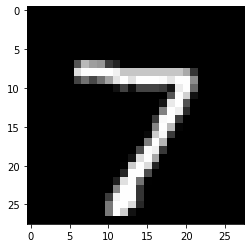

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')

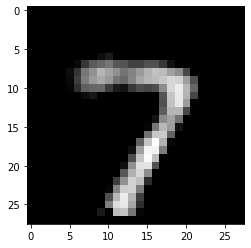

In [31]:
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')

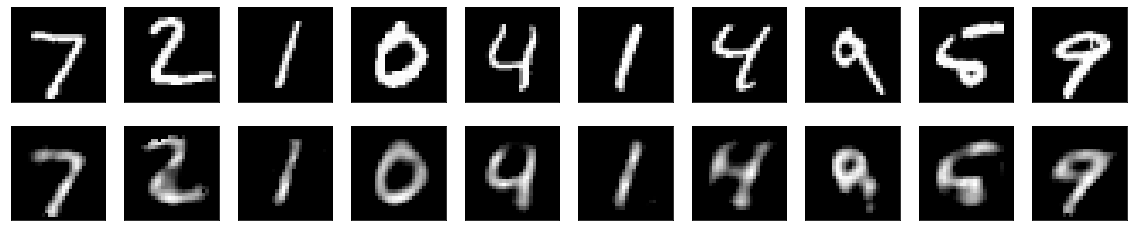

In [32]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()